# Numerical Practicum: HW1 
## Intro - Recap of Preliminaries

In [95]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"%plt.__name__)
import pandas as pd
print("Succesfully imported %s -- Version: %s"%(pd.__name__,pd.__version__))
# from sympy import Function, dsolve, Eq, Derivative, symbols
import sympy as sp
from scipy import optimize
print("Succesfully imported %s"%optimize.__name__)
import numpy as np
from scipy.integrate import solve_ivp
print("Succesfully imported %s"%solve_ivp.__name__)

Succesfully imported numpy -- Version: 1.20.1
Succesfully imported scipy -- Version: 1.6.2
Succesfully imported matplotlib.pyplot
Succesfully imported pandas -- Version: 1.2.4
Succesfully imported scipy.optimize
Succesfully imported solve_ivp


Our goal: Recap of prerequisites. Prepare for forthcoming assignments. In particular 
1. spatial discretization of first and second order derivatives in space and time using the finite difference method: used in solving Poisson-Boltzmann equation and reaction-diffusion systems; 
2. time-integration methods using explicit and implicit time-integration methods: used in solving reaction-diffusion problems and chemical reactors; 
3. non-linear system solvers using derivative-based methods including techniques to compute the Jacobian: used in Poisson-Boltzmann equation; 
4. solving linear systems solvers using direct solution methods: used in data handling methods and large scale partial differential equation problems; 

Out-of-scope: to be defined; 

References:  
1. to be inserted 

Tentative deadline for students to hand-in their assignment: September 30th; 

Formative assessment: Discussion of how assignment went after grading of assignments;

## Section 3/6: Extension to time-dependent 

Our goals 

1. Extend to partial differential and add transient term. State problem to solve. Perform spatial discretization as above. Solve system of ordinary differential equation using a built-in time-stepping method. Give physical interpretation of solution obtained; 

References 
1. References to baschelor courses
2. [The Method of Euler in Python](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.03-The-Euler-Method.html)
3. [Finite Difference Method for ODE and PDE on wiki](https://en.wikipedia.org/wiki/Finite_difference_method)
4. [2D Discrete Poisson Eqiuation on wiki](https://en.wikipedia.org/wiki/Discrete_Poisson_equation)

 ### Problem statement 
 
 Here we aim at numerically solving the heat equation on the domain where $0 \leq x \leq 1$ and $0 \leq t \leq T$ where $T$ denotes the final time. Our objective is to numerically approximate the function
$u(x,t)$ that is the solution of the following problem:

Given an integer k, find the function u(x; t) that is the solution of the partial differential equation


\begin{equation}
 \frac{∂u}{∂t}=\frac{\text{d}^2u}{\text{d}x^2} \text{          for         } 0\leq x \leq 1 \text{          and         }  0\leq t \leq T \tag{15}
\end{equation}

supplied with the following Dirichlet boundary condition in $x = 0$ and in $x = 1$

\begin{equation}
 u(x=0,t)=0  \text{          and         }   u(x=1,t)=0 \text{          and         } 0\leq t \leq T \tag{16}
\end{equation}

and the following initial condition

\begin{equation}
 u(x,t=0)=sin(k π x)  \text{          for         } 0\leq x \leq 1 \tag{17}
\end{equation}

Compared to the tutorial of last week, we now added a time derivative term. In the assignment that follows we have the chance to observe that the space coordinate $x$ and the time coordinate $t$ are treated in a different
fashion. This allows to mathematically treat the physics captured in the problem stated. The heat equation is important for the computational chemical engineers, cooks, bakers and brewers as it provides fundamental
insight into how an oven is brought to appropriate temperature, kept there and cooled down again. In more advanced models a convective term can be included as well.

#### Analytical Reference Solution 

The differential equation $(15)$ supplied with the boundary conditions $(16)$
and initial condition $(17)$ can be solved analytically by for instance a technique referred to as separation of variables. In this technique the solution for $u(x,t)$ is written as $u(x,t)= X(x) T(t)$, where the function $X$
only depends on $x$ and the function $T$ only depends on $t$. Substituting this form of the solution into the differential equation $(15)$ leads to a boundary value problem for $X(x)$ and an initial value problem for $T(t)$.
Combining these solution appropriately leads to a solution for $u(x,t)$. Proceeding along this path, one finds for the above problems the analytical solution

\begin{equation}
 u(x,t)=sin(k π x)exp(-k^2 π^2 t) \tag{18}
\end{equation}


#### Assignment 6 (1 point)

First, verify that the function $u(x)$ given by $(18)$ indeed satisfies the differential equation $(15)$, both boundary conditions $(16)$ as well as the initial conditions $(17)$. Please do so using pen and paper.
Next, choose $k = 3$ and plot the function $u(x, t)$ as a function of $x$ for $0\leq x \leq 1$ and $0\leq t \leq 0.1$ by avoiding for-loops using for instance a combination of the numpy.meshgrid() and plot_surface().
Compare different values for $k$ using for instance $k = 1$, $k = 2$ and $k = 4$.
In line with our previous observations, we will treat the space coordinate $x$ and the time coordinate $t$ in a different way. We will discretize first in space and later in time.

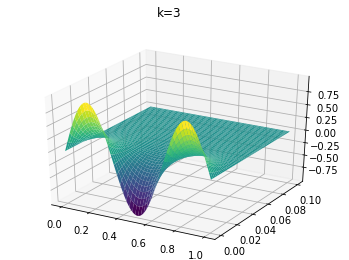

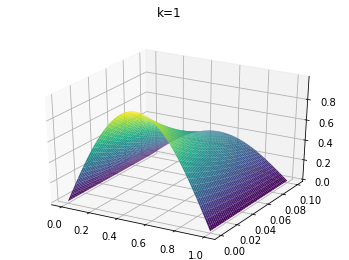

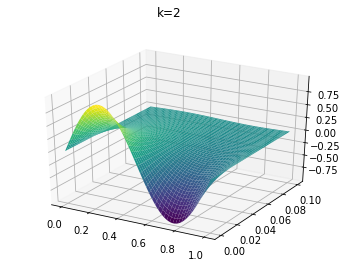

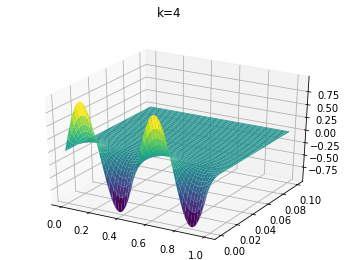

In [3]:
from mpl_toolkits.mplot3d import Axes3D


x = np.linspace(0,1,150)
t = np.linspace(0,0.1,150)
X,T = np.meshgrid(x,t, sparse = True)

def u(x,t,k):
    return np.sin(k*np.pi*x)*np.exp(-(k**2)*(np.pi**2)*t)

U3 = u(X, T, 3)
fig = plt.figure()
ax = plt.gca (projection = '3d')
surf = ax.plot_surface(X,T,U3, cmap='viridis')
fig.suptitle('k=3')
plt.show()

U1 = u(X, T, 1)
fig = plt.figure()
ax = plt.gca (projection = '3d')
surf = ax.plot_surface(X,T,U1, cmap='viridis')
fig.suptitle('k=1')
plt.show()

U2 = u(X, T, 2)
fig = plt.figure()
ax = plt.gca (projection = '3d')
surf = ax.plot_surface(X,T,U2, cmap='viridis')
fig.suptitle('k=2')
plt.show()

U4 = u(X, T, 4)
fig = plt.figure()
ax = plt.gca (projection = '3d')
surf = ax.plot_surface(X,T,U4, cmap='viridis')
fig.suptitle('k=4')
plt.show()




### 2.1 Finite Difference Semi-Discretization in Space

#### Spacial Mesh

Assume as before that the interval $0\leq x \leq 1$ is discretized by an uniform mesh consisting of $N$ elements with mesh width $h = 1/N$ and vertices $x_{i}=(i-1)h$, where $i$ runs from $1$ to $N + 1$. The
grid nodes can then be denoted by

\begin{equation}
 G_h=\Bigg({x_{i}|x_{i}=(i-1)h; h=\frac{1}{N}, 1\leq i \leq N+1}\Bigg) \tag{19}
\end{equation}

Let $u^h(t)$ denote the time-dependent vector with $N + 1$ components such its $i$-th component $u^h_{i}(t)$ approximates the exact solution $u(x, t)$ in the $i$-th node. One can think of $u^h(t)$ as a set of time-evolving coordinates of a particle of a space in $N + 1$ dimensions. The path of this particle is then described by the time-dependence of $u^h(t)$.

#### Discretization of the differential equation in the internal nodes

The partial differential equation $(15)$ holds in particular for all of the internal nodes, that is, we have that

\begin{equation}
 \frac{\text{∂}u}{\text{∂}t}\Bigg|_{(x,t)=(x_{i},t)}=\frac{\text{∂}^2u}{\text{∂}x^2}\Bigg|_{(x,y)=(x_{i},t)} \text{  for all  } 2\leq i \leq N  \text{  and for all  } 0\leq t \leq T  \tag{20}
\end{equation}

The right-hand side of this equation can then be approximated by

\begin{equation}
 \frac{\text{∂}^2u}{\text{∂}x^2}\Bigg|_{(x,y)=(x_{i},t)}\approx\frac{u(x_{i-1},t)-2u(x_{i},t)+u(x_{i+1},t)}{h^2}    \tag{21}
\end{equation}


#### Discretization in the left and right boundary condition

Verify that the Dirichlet boundary condition in the left and right end point can be enforced by requiring that

\begin{equation}
 u_{1}(t)=0  \text{          and that         }   u_{N+1}(t)=0 \text{         for all         } 0\leq t \leq T \tag{22}
\end{equation}

#### Discretization in the left and right boundary condition 

Verify that the initial condition $(17)$ can be enforced by requiring that

\begin{equation}
 u_{i}(t=0)=sin(k π x_{i})  \text{         for all        }   1\leq i \leq N+1 \tag{23}
\end{equation}

The equations on the internal and boundary nodes can then be formulated as the following system of ordinary differential equations supplied witrh initial conditions

\begin{equation}
 \frac{du^h(t)}{dt}=A^h u^h(t)  \text{         and        } u^h(t=0)=sin(k π x)  \tag{24}
\end{equation}

where due care is needed in appropriately incorporating the sign in the matrix $A^h$ and in handling the boundary conditions.

### 2.2 Finite Difference Discretization in Time

The system of ordinary differential equations $(24)$ can be solved by using a Python built-in ODE solver (such as scipy.integrate.solve_ivp()) or by coding a time-integration method

#### Temporal Mesh

To derive time integration methods, we assume an uniform mesh in the time with nodes

\begin{equation}
 \Bigg({t_{j}|t_{j}=(j-1)Δt; Δt=\frac{T}{M}, 1\leq j \leq M+1}\Bigg) \tag{25}
\end{equation}

We will denote $u^h_{j}= u^h(t = t_{j})$. As time integration methods we will discuss the Euler forward and the Euler backward method.

#### Forward Euler Method 

To derive the Euler forward method, we assume that the system of ODEs $(24)$
holds for $t = t_{j}$ and approximate the time derivative by a forward difference formula, i.e.,

\begin{equation}
 \frac{du^h(t)}{dt}(t=t_{j})=A^h u^h(t=t_{j})
\end{equation}
\begin{equation}
 \text{                       If and only if        }\frac{u^h_{j+1}-u^h_{j}}{Δt}=A^h u^h_{j}
\end{equation}
\begin{equation}
 \text{                       If and only if        }u^h_{j+1}=(I + Δt A^h)u^h_{j} \text{         for        }   0\leq j \leq M \text{         with        }  u^h_{0} \text{         given        }  \tag{26}
\end{equation}

This recursion allows to compute $u^h_{j}$ for all values of $j$.

#### Backward Euler Method 

To derive the Euler backward method, we assume that the system of ODEs $(24)$
holds for $t = t_{j}$ and approximate the time derivative by a backward difference formula, i.e.,

\begin{equation}
 \frac{du^h(t)}{dt}(t=t_{j})=A^h u^h(t=t_{j})
\end{equation}
\begin{equation}
 \text{                       If and only if        }\frac{u^h_{j}-u^h_{j-1}}{Δt}=A^h u^h_{j}
\end{equation}
\begin{equation}
 \text{                       If and only if        }u^h_{j}=(I - Δt A^h)^{-1} u^h_{j-1} \text{         for        }   1\leq j \leq M+1 \text{         with        }  u^h_{0} \text{         given        }  \tag{27}
\end{equation}

This recursion again allows to compute $u^h_{j}$ for all values of $j$.


#### Assignment 7 (1 point)
Assume $T = 0.1$ and $h = 1/100$. Solve the system of ODEs $(24)$ using Python’s scipy.integrate.solve_ivp(). Plot the numerical solution obtained as a function of $x$ and $t$.

#### Solving Scalar ODE using Scipy 
Put example here.

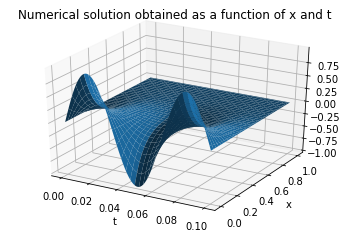

In [56]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy import integrate

x = np.linspace(0,1,101)
t = np.linspace(0,0.1,101)
k = 3

XX, TT = np.meshgrid(x,t)
u0= np.sin(k*np.pi*x)

def h(t,u):
    N = 100
    h = 1/N
    A = np.zeros([N+1, N+1])
    for i in range(1,N):
        A[i,i-1:i+2] = [(1/(h**2)), (-2/(h**2)), (1/(h**2))]
        A[0,0] = 1
        A[-1,-1] = 1
    dudt = np.dot(A,u)
    return dudt

sol=integrate.solve_ivp(h,t_span=[0,0.1],y0=u0,t_eval=t)
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(TT,XX,sol.y)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Numerical solution obtained as a function of x and t')
plt.show()




#### Assignment 8 (1.5 points)

Assume $T = 0.1$, $h = 1/100$ and a uniform mesh with $Δt=T/20$ along the time axis. Solve the system of ODEs $(24)$ using the forward Euler method. Plot the numerical solution obtained as a function of $x$ and $t$.


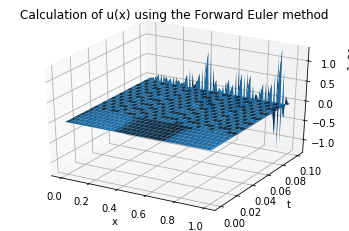

In [58]:
T=0.1
M=20
N=100
dt=T/M

x = np.linspace(0, 1, N+1)
t = np.linspace(0, 0.1, M+1)
tt,xx=np.meshgrid(t,x)

u=np.zeros((N+1,M+1))
u[:,0]=np.sin(3*np.pi*x)

def h(t,u):
    N = 100
    h = 1/N
    A = np.zeros([N+1, N+1])
    for i in range(1,N):
        A[i,i-1:i+2] = [(1/(h**2)), (-2/(h**2)), (1/(h**2))]
        A[0,0] = 1
        A[-1,-1] = 1
    dudt = np.dot(A,u)
    return dudt

for i in range(Nt):
    u[:,i+1]=h(t,u[:,i])*dt+u[:,i]

fig = plt.figure()
ax=fig.gca(projection='3d')
ax.plot_surface(xx,tt,u)
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.title('Calculation of u(x) using the Forward Euler method')
plt.show()
    

#### Assignment 9 (1.5 points)

Assume $T = 0.1$, $h = 1/100$ and a uniform mesh  with $Δt = T/20$ along the time axis. Solve the system of ODEs $(24)$ using the backward Euler method. Plot the numerical solution obtained as a function of $x$ and $t$.

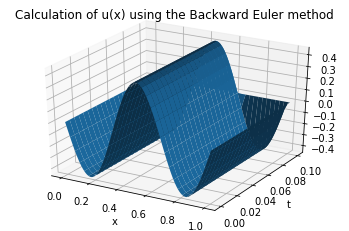

In [57]:
T=0.1
M=20
N=100
dt=T/M

x = np.linspace(0, 1, N+1)
t = np.linspace(0, 0.1, M+1)
tt,xx=np.meshgrid(t,x)

u=np.zeros((N+1,M+1))
u[:,0]=np.sin(3*np.pi*x)

def h(t,u):
    N = 100
    h = 1/N
    A = np.zeros([N+1, N+1])
    for i in range(1,N):
        A[i,i-1:i+2] = [(1/(h**2)), (-2/(h**2)), (1/(h**2))]
        A[0,0] = 1
        A[-1,-1] = 1
    dudt = np.dot(A,u)
    return dudt

for i in range(M):
    u[:,i]=h(t,u[:,i])*dt+u[:,i-1]


fig = plt.figure()
ax=fig.gca(projection='3d')
ax.plot_surface(xx,tt,u)
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.title('Calculation of u(x) using the Backward Euler method')
plt.show()

(101, 6034)


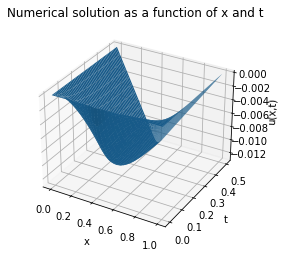

In [94]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def righthandside_dt(t,u,A,fvec):
    dudt = -np.dot(A,u) - fvec 
    return dudt  
    
N = 100; Np1 = N+1;

# define spatial mesh 
xvec = np.linspace(0,1,Np1)

# define matrix 
A = poisson_1d(N)

# define right-hand side vector 
fvec = np.exp(-(xvec-.4)**2/1e-3)
fvec[0] = 0; fvec[-1] = 0;

# set initial guess: the initial guess should hrere satisfy the boundary conditions!   
ustart = np.zeros(Np1); ustart[0] = 0.; ustart[-1] = 0.; 

#..perform time integration  
computed = scipy.integrate.solve_ivp(righthandside_dt,args=(A,fvec),t_span=[0,0.5],y0=ustart)

#..prepare variables for plotting 
t = computed.t
XX, TT = np.meshgrid(xvec,t[1:])

#..post-processing 
fig = plt.figure()
axes = fig.gca(projection='3d')
z = computed.y[:,1:]
print(np.shape(z))
axes.plot_surface(XX,TT,z.T)
axes.set_xlabel('x')
axes.set_ylabel('t')
axes.set_zlabel('u(x,t)')
axes.set_title('Numerical solution as a function of x and t')
plt.show()

### References 
1. [Seperation of Variables on wiki](https://en.wikipedia.org/wiki/Separation_of_variables) 

## Section 4/6: Extension to two-dimensional probems 

Our goals: 

1. Extend to partial differential and add second partial derivastive with respect to space. State problem to solve. Perform spatial discretization as above. Form coefficient matrix as sum of two Kronecker products. Solve linear system of  equations using a built-in time-stepping method. Give physical interpretation of solution obtained;

In [129]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def mark_boundary(N):
    A = np.zeros((Np1,Np1)); A[1:-1,1:-1]=-1;
    Avec = np.reshape(A,Np1**2)
    Iint = np.argwhere(Avec == -1); Ibnd = np.argwhere(Avec == 0)
    return Iint, Ibnd

N = 10; Np1 = N+1;

# define spatial mesh 
xvec = np.linspace(0,1,N+1)

# define matrix 
A1 = poisson_1d(N) 
Iint, Ibnd = mark_boundary(N)
I1 = np.identity(Np1)
A  = np.kron(A1,I1) + np.kron(I1,A1); 

# define rhs-vector 
xx, yy = np.meshgrid(xvec, xvec)
ff = xx*(xx-1)*yy*(yy-1)
fvec = np.reshape(ff,Np1**2)

# handle the boundary conditions in A 
IJ = np.ix_(Ibnd[:,0],Ibnd[:,0]); A[IJ] = np.identity(Ibnd[:,0].size); 
IJ = np.ix_(Ibnd[:,0],Iint[:,0]); A[IJ] = np.zeros((Ibnd[:,0].size,Iint[:,0].size)) 

# solve linear system for u 
u = np.linalg.solve(A,fvec)

uu = np.reshape(u, (Np1, Np1))

### 

### References: 
1. [Five-Point Stencil on wiki](https://en.wikipedia.org/wiki/Five-point_stencil) 